In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



character(0)

# Import Required Libraries

In [2]:
library(ggplot2)
library(ggpubr)

# Data Gathering

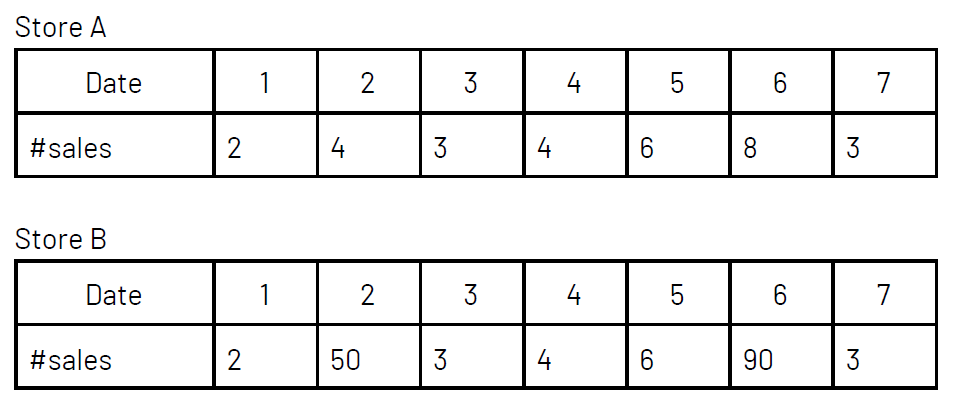

In [3]:
date <- 1:7
sales_A <- c(2, 4, 3, 4, 6, 8, 3)
sales_B <- c(2, 50, 3, 4, 6, 90, 3)

sales_performance_A <- data.frame("Date" = as.character(date),
                                  "Sales_A" = sales_A)
sales_performance_B <- data.frame("Date" = as.character(date),
                                  "Sales_B" = sales_B)

In [4]:
sales_performance_A

Date,Sales_A
<chr>,<dbl>
1,2
2,4
3,3
4,4
5,6
6,8
7,3


In [5]:
sales_performance_B

Date,Sales_B
<chr>,<dbl>
1,2
2,50
3,3
4,4
5,6
6,90
7,3


# Summary Statistics

In [6]:
summary_stats_A <- data.frame ("Mean" = mean(sales_performance_A$Sales_A), 
                               "Median" = median(sales_performance_A$Sales_A), 
                               "Variance" = var(sales_performance_A$Sales_A), 
                               "Standard Deviation" = sd(sales_performance_A$Sales_A))
summary_stats_A

Mean,Median,Variance,Standard.Deviation
<dbl>,<dbl>,<dbl>,<dbl>
4.285714,4,4.238095,2.058663


In [7]:
summary_stats_B <- data.frame ("Mean" = mean(sales_performance_B$Sales_B), 
                               "Median" = median(sales_performance_B$Sales_B), 
                               "Variance" = var(sales_performance_B$Sales_B), 
                               "Standard Deviation" = sd(sales_performance_B$Sales_B))
summary_stats_B

Mean,Median,Variance,Standard.Deviation
<dbl>,<dbl>,<dbl>,<dbl>
22.57143,4,1184.619,34.4183


We can see that the difference between the mean and median of Store A sales is much smaller than Store B's.

# Bar Plot

We can use bar chart as representation of the tabular data, since it is easier to see the progress of each store in a week (day 1-7).

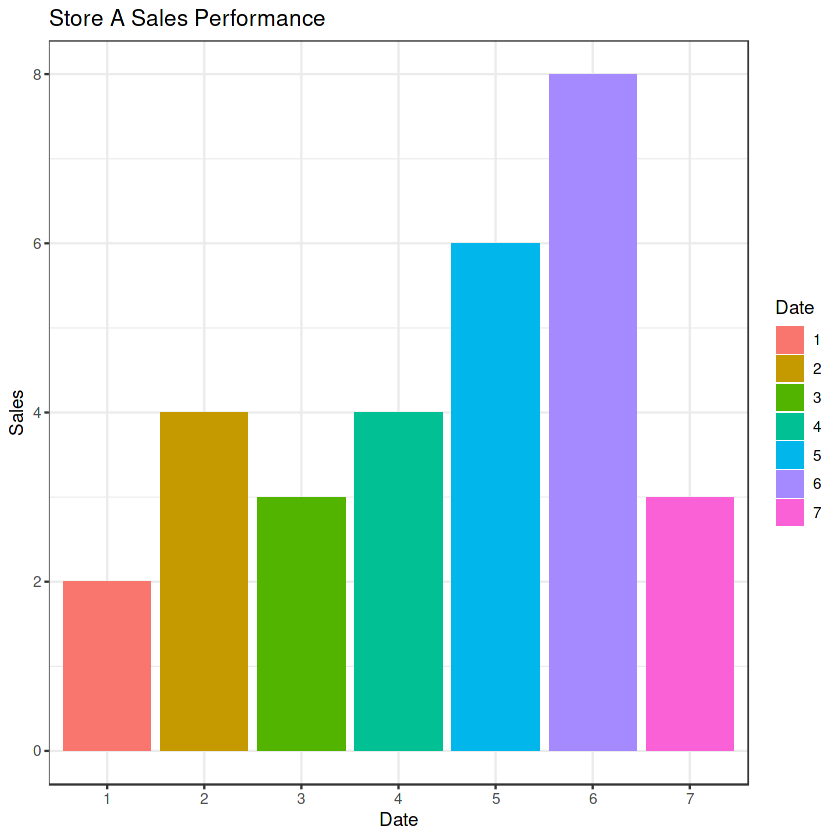

In [8]:
barplot_A <- sales_performance_A %>%
  ggplot(aes(x = Date, y = sales_A, fill = Date)) + geom_col() +
  ggtitle("Store A Sales Performance") +
  labs(x = "Date", y = "Sales") + theme_bw()

barplot_A

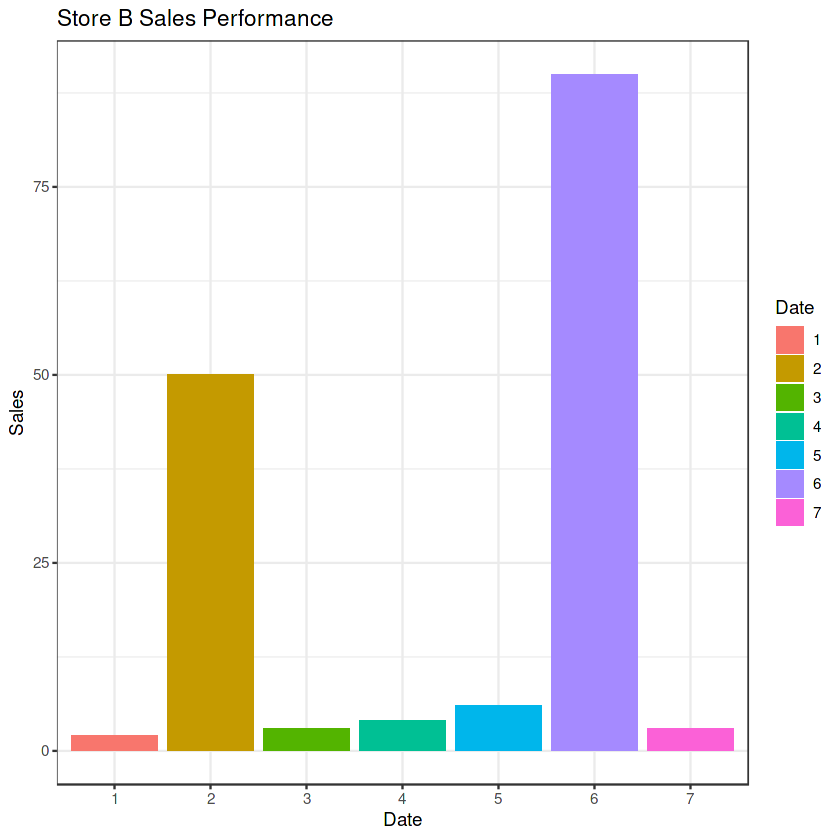

In [9]:
barplot_B <- sales_performance_B %>%
  ggplot(aes(x = Date, y = Sales_B, fill = Date)) + geom_col() + 
  ggtitle("Store B Sales Performance") +
  labs(x = "Date", y = "Sales") + theme_bw()

barplot_B

# Histogram

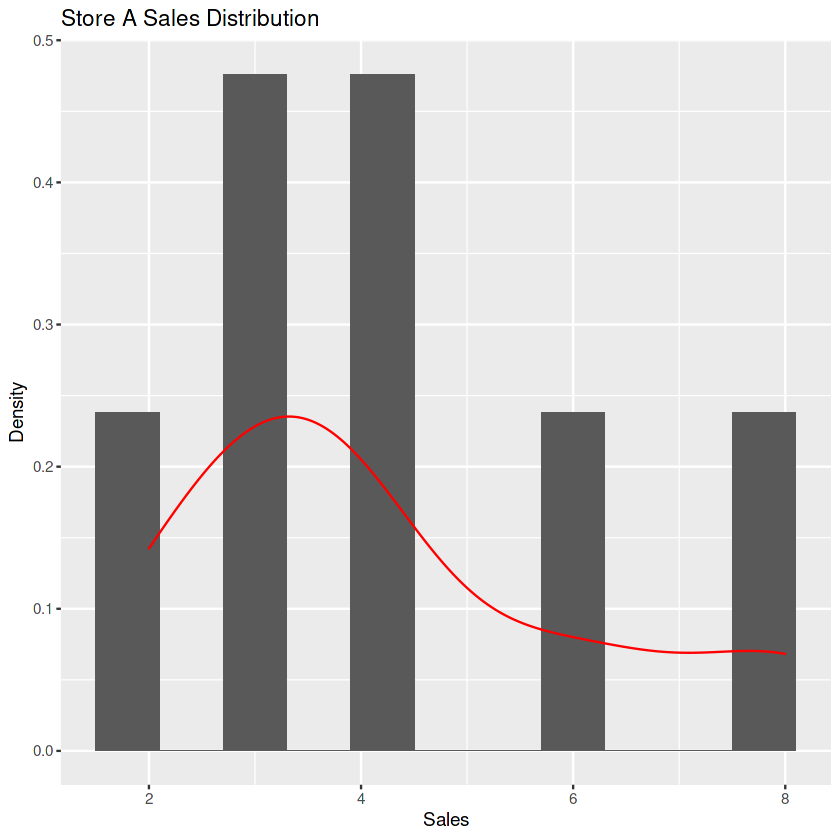

In [10]:
histogram_A <- sales_performance_A %>%
  ggplot(aes(x = sales_A, y = stat(density))) + 
  geom_histogram(bins = 10, binwidth = 0.6) + geom_density(color = "red") +
  ggtitle("Store A Sales Distribution") +
  labs(x = "Sales", y = "Density")

histogram_A

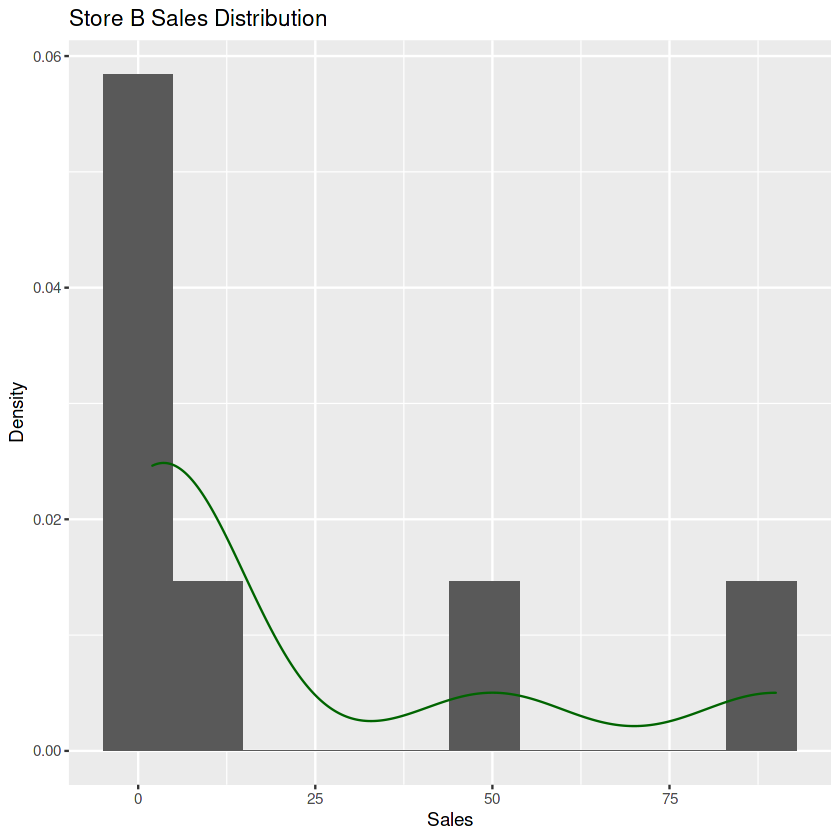

In [11]:
histogram_B <- sales_performance_B %>%
  ggplot(aes(x = sales_B, y = stat(density))) + 
  geom_histogram(bins = 10) + geom_density(color = "darkgreen") +
  ggtitle("Store B Sales Distribution") +
  labs(x = "Sales", y = "Density")

histogram_B

# Density Plot

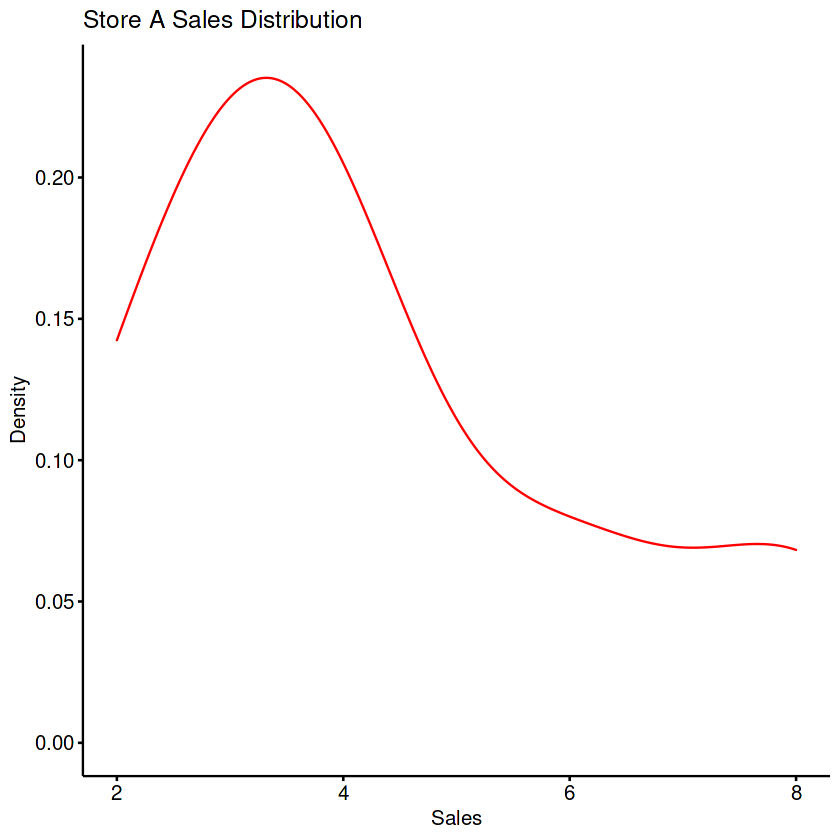

In [12]:
ggdensity(sales_performance_A$Sales_A, color = "red", 
          title = "Store A Sales Distribution", 
          xlab = "Sales", ylab = "Density")

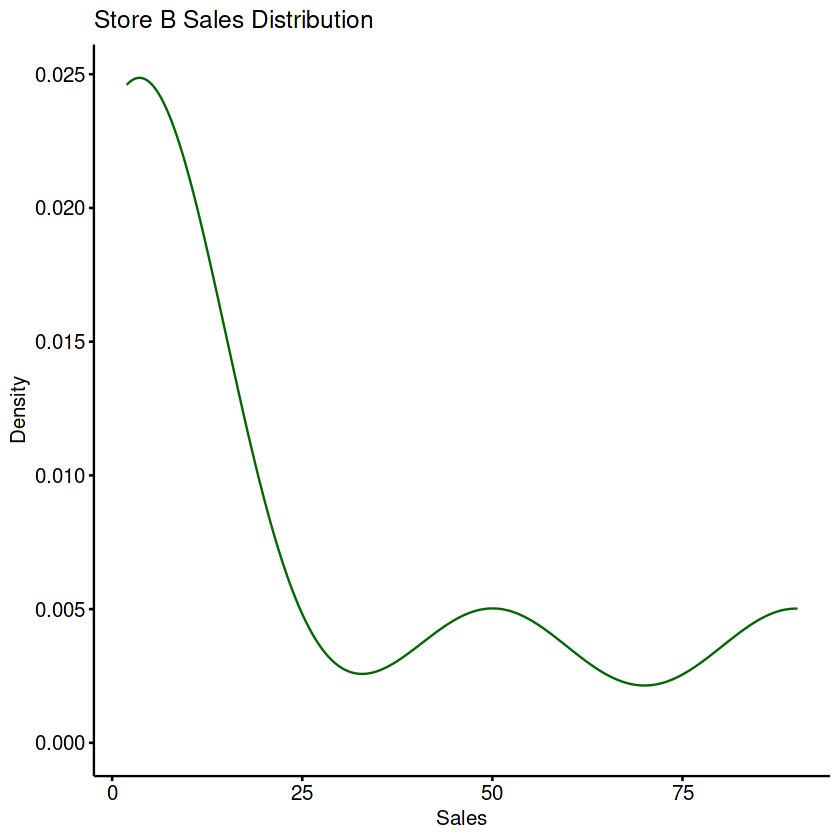

In [13]:
ggdensity(sales_performance_B$Sales_B, color = "darkgreen", 
          title = "Store B Sales Distribution", 
          xlab = "Sales", ylab = "Density")

From both histograms and density plots above, we can roughly see that the distribution of Store A sales looks more like a bell-shaped curve rather than the distribution Store B sales. But in order to view in more detail, we can use Q-Q Plot and boxplot, since they can give us the clearer visualizations so that we can such examine the distribution of each store and detect some outliers if any.

# Q-Q Plot

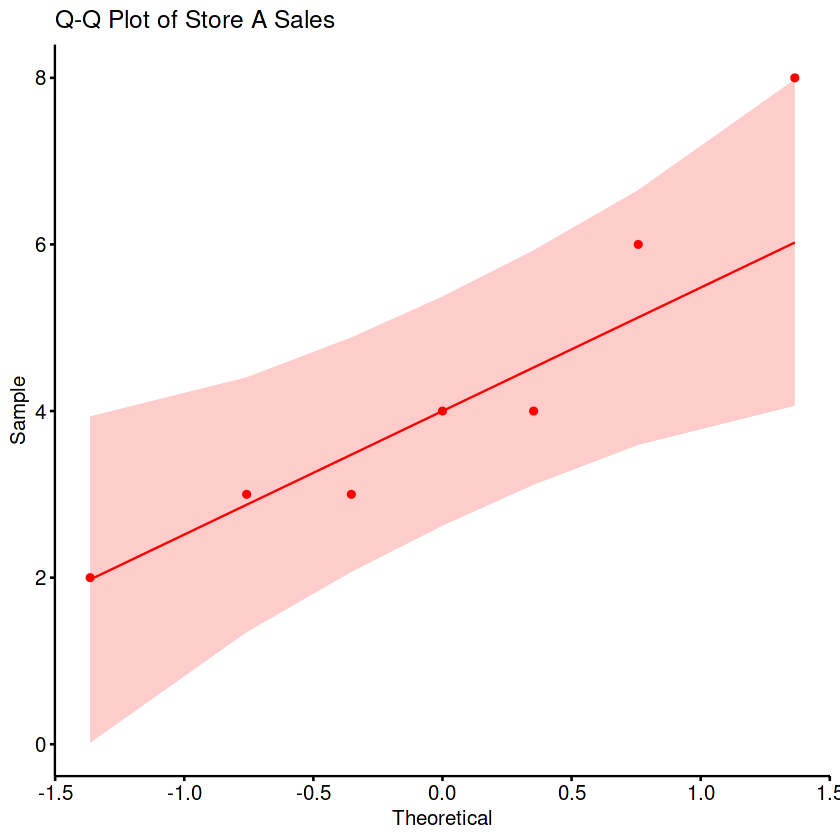

In [14]:
ggqqplot(sales_performance_A$Sales_A, title = "Q-Q Plot of Store A Sales", col = "red")

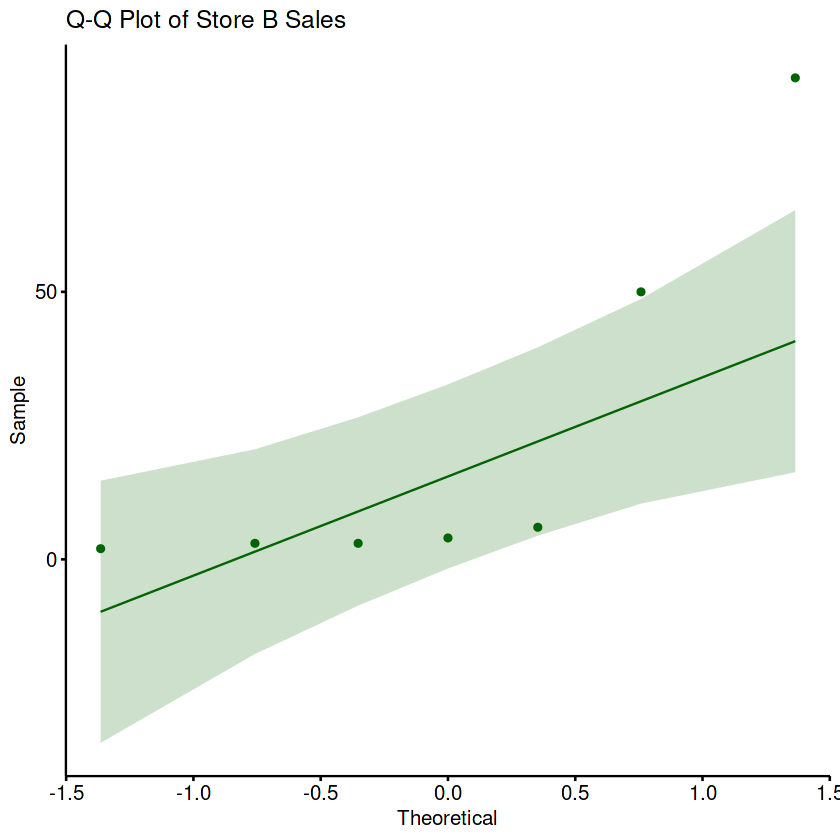

In [15]:
ggqqplot(sales_performance_B$Sales_B, title = "Q-Q Plot of Store B Sales", color = "darkgreen")

The Q-Q Plot of Store A sales shows that most of the data points are quite close to the reference line. Meanwhile the Q-Q Plot of store B sales clearly indicates that some data points are far away from the reference line, this is also supported by the fact that the variability of Store B sales is much higher than Store A sales (look at the y-axis values).

# Box Plot

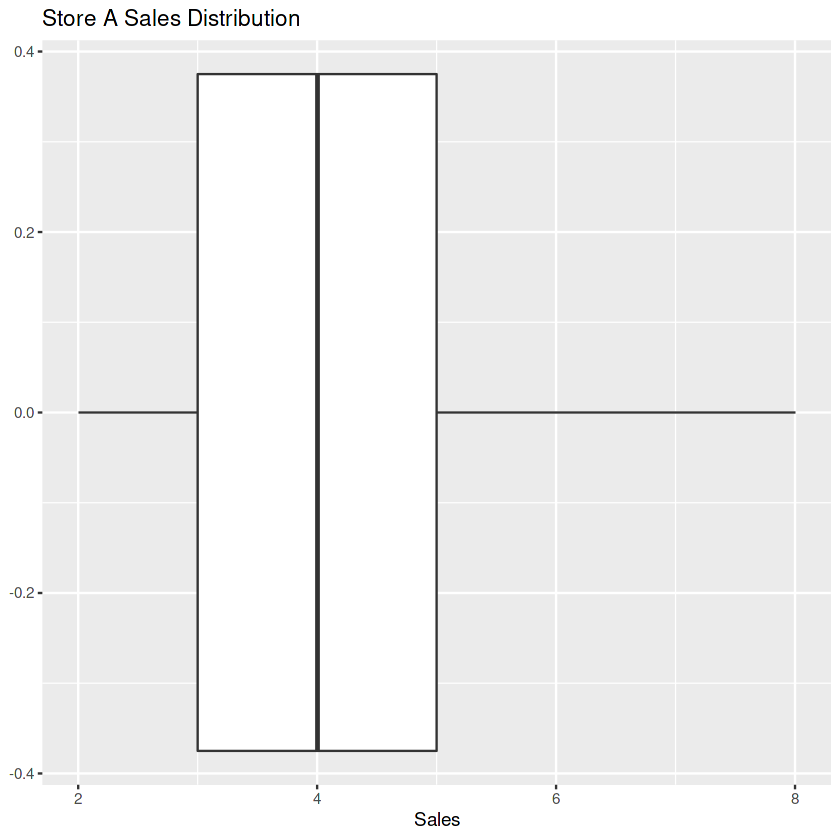

In [16]:
sales_performance_A %>%
  ggplot(aes(x = sales_A)) + geom_boxplot() +
  ggtitle("Store A Sales Distribution") +
  labs(x = "Sales")

In the box plot of Store A sales, the thick line (in the box) divides the box into two quite equal parts. This shows that the median (the thick line itself) is not so close nor so far to both lower and upper quartiles (Q1 and Q3). The box is also not too far away from the middle of the plot. This is included as one of the characteristics of the normal distribution.  

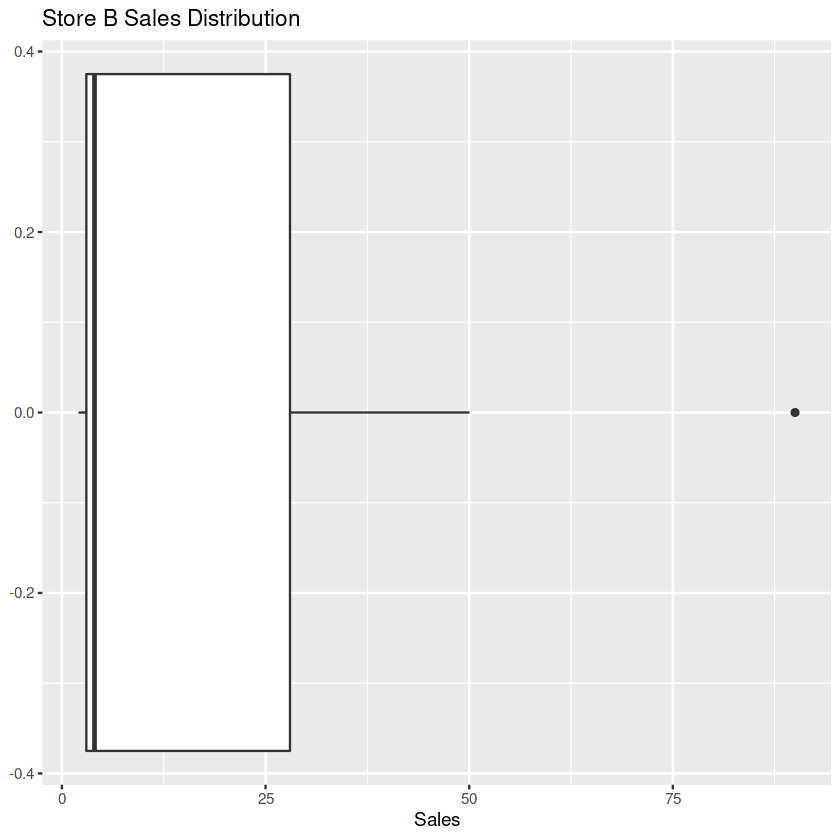

In [17]:
sales_performance_B %>%
  ggplot(aes(x = sales_B)) + geom_boxplot() +
  ggtitle("Store B Sales Distribution") +
  labs(x = "Sales")

In the box plot of Store B sales, the thick line does not divide the box into two equal parts. The median is extremely close to the lower quartile which makes the distribution skewed. There is also an outlier that can be clearly seen at the rightmost part of the plot.

From both box plots, we can interpret that Store A sales distribution is somewhat normally distributed meanwhile the Store B sales distribution is not. BUT, are we statistically sure about this? To make sure, we need a Shapiro-Wilk's normality test which one of the results is the p-value, that can help us to determine whether we need to assume the normality.

# Shapiro-Wilk's Test

In [18]:
shapiro.test(sales_performance_A$Sales_A)


	Shapiro-Wilk normality test

data:  sales_performance_A$Sales_A
W = 0.90185, p-value = 0.3424


In [19]:
shapiro.test(sales_performance_B$Sales_B)


	Shapiro-Wilk normality test

data:  sales_performance_B$Sales_B
W = 0.67955, p-value = 0.002208


From both of the results above, we can confidently say that Store A sales distribution is quite close to normal distribution whilts the distribution of Store B sales is not. 

**This result can help us to answer the question below.**

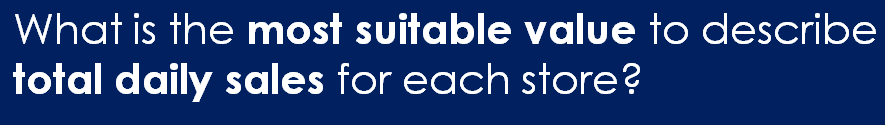
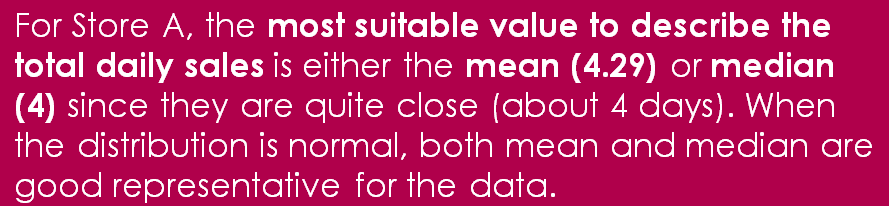
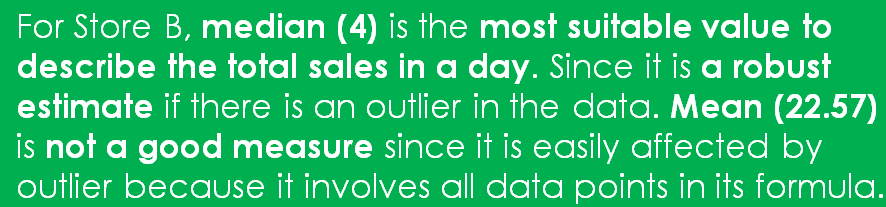